<h1>Data Visualization I</h1>
<ol>
<li>
Use the inbuilt dataset 'titanic. The dataset contains 891 rows and contains information about the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to see if we can find any patterns in the data.</li>
<li>    
Write a code to check how the price of the ticket (columnname:'fare') for each passenger is distributed by plotting a histogram.</li>
    </ol>

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [98]:
df['Age'] = df['Age'].fillna(np.mean(df['Age']))
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

### Correlation between count of survived people and sex

In [99]:
df['Survived'] = df['Survived'].replace({0:"Not Survived",1:"Survived"})

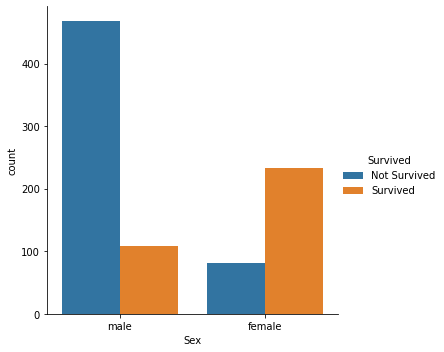

In [100]:
sns.catplot(x="Sex",kind='count' ,hue="Survived",data=df)

### Correlation between Passenger Class and Count of survived people

In [101]:
group = df.groupby([df['Pclass'],df['Survived']],observed=False)

In [102]:
group['Pclass'].value_counts()

Pclass  Survived    
1       Not Survived     80
        Survived        136
2       Not Survived     97
        Survived         87
3       Not Survived    372
        Survived        119
Name: count, dtype: int64

In [103]:
pclass_survived = group.size().unstack() 
pclass_survived
#unstack() ==>This reshapes the grouped data from a multi-level index Series to a DataFrame


Survived,Not Survived,Survived
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Survived', ylabel='Pclass'>

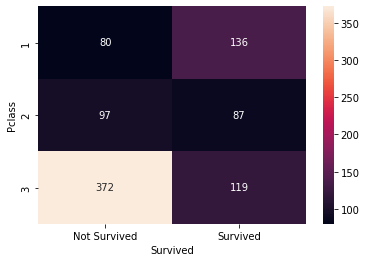

In [104]:
sns.heatmap(pclass_survived,annot = True,fmt = 'd')
# fmt stands for format and 'd' stands for 'decimal integer.
# annot = True for showing annotation 

### Correlation b/w Age, Sex and distribution of Survived

<Axes: xlabel='Age', ylabel='Sex'>

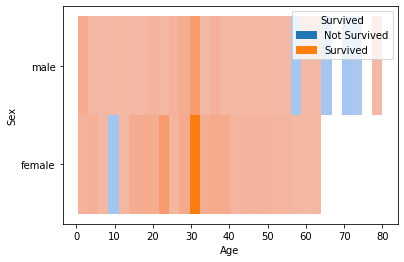

In [105]:
sns.histplot(x = 'Age', y = 'Sex' , data = df, hue = 'Survived' )

<Axes: xlabel='Age', ylabel='Sex'>

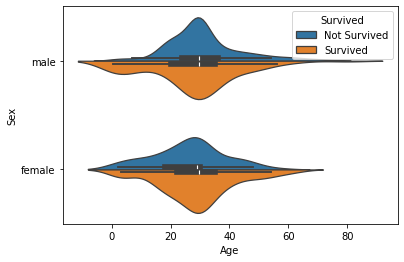

In [106]:
sns.violinplot(x='Age',y='Sex',data = df,hue = 'Survived',split = True)

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3370: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3370: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Sex', ylabel='Age'>

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3370: UserWarning: 25.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3370: UserWarning: 11.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


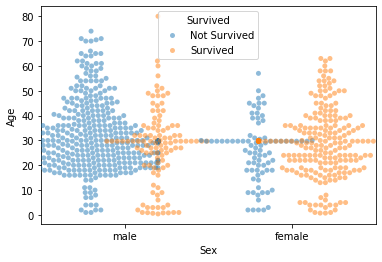

In [107]:
sns.swarmplot(x="Sex", y="Age", hue="Survived", data=df, dodge=True, alpha=0.5)
# Highly optional !!!

### Correlation b/w Fare and Survival Probability

In [108]:
df['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [109]:
df['fare_range'] = pd.qcut(df['Fare'],8)
df['fare_range'].value_counts()

fare_range
(-0.001, 7.75]       140
(9.841, 14.454]      113
(24.479, 31.0]       112
(69.488, 512.329]    112
(7.91, 9.841]        111
(14.454, 24.479]     110
(31.0, 69.488]       110
(7.75, 7.91]          83
Name: count, dtype: int64

In [110]:
df.dtypes

PassengerId       int64
Survived         object
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
fare_range     category
dtype: object

<Axes: xlabel='count', ylabel='fare_range'>

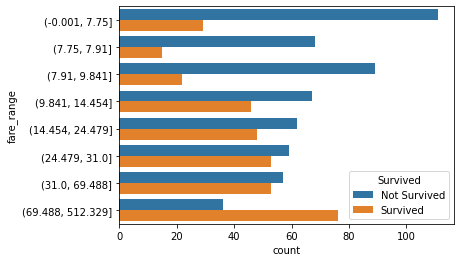

In [111]:
sns.countplot(y="fare_range",hue='Survived',data = df)

### Correlation b/w City Embarked on, Passenger Class and Count of Survived

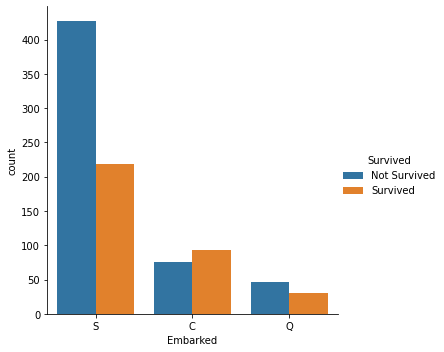

In [112]:
sns.catplot(x= 'Embarked' , hue='Survived' , kind="count" , data=df)

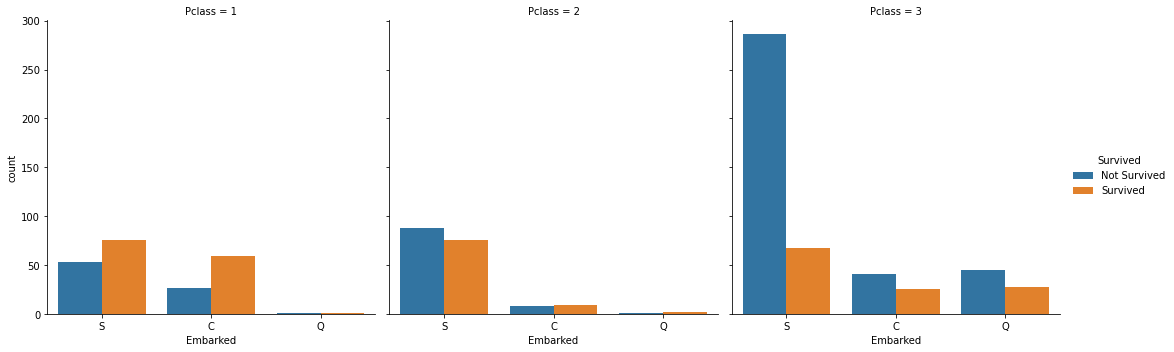

In [113]:
sns.catplot(x= 'Embarked' , hue='Survived' , kind="count" , data=df,col='Pclass')

<Axes: xlabel='Fare', ylabel='Count'>

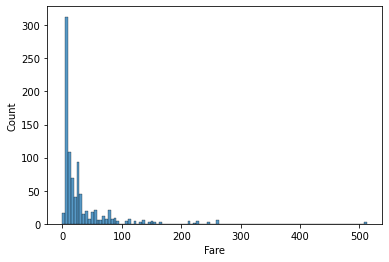

In [122]:
sns.histplot(x='Fare' , data = df)

<Axes: xlabel='Survived', ylabel='count'>

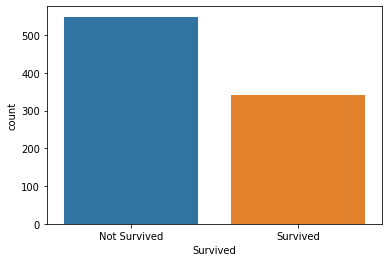

In [127]:
sns.countplot(data = df,hue='Survived',x = 'Survived')

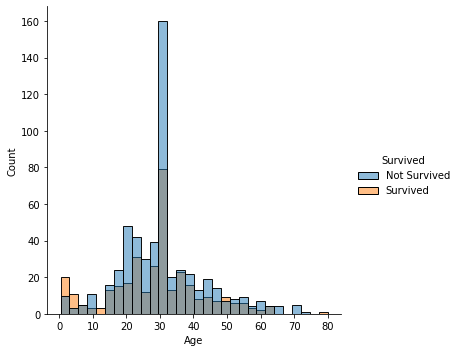

In [131]:
sns.displot(x = 'Age',hue = 'Survived',data = df)

In [ ]:
# tc = data.corr()
# sns.heatmap(tc, cmap="YlGnBu")
# plt.title('Correlation')

#it will be giving error as passengers name and all cannot be resolved ;) 